# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Energy_Dataset.csv for time series forecasting

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [8]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [12]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Energy_Dataset.csv', 
                 parse_dates=['date_time'], index_col='date_time')

# Data Overview

**Data Dictionary**

* **time**: Datetime index localized to CET
* **total load forecast**: forecasted electrical demand
* **total load actual**: actual electrical demand
* **price day ahead**: forecasted price EUR/MWh
* **price actual**: price in EUR/MWh
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording

**Data Preview**

In [13]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35064, 9)


,total_load_forecast,total_load_actual,price_day_ahead,price_actual,date,time,weekday,month,year
date_time,,,,,,,,,
2015-01-01 00:00:00,26118.0,25385.0,50.10,65.41,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,24934.0,24382.0,48.10,64.92,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,23515.0,22734.0,47.33,64.48,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,22642.0,21286.0,42.27,59.32,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,21785.0,20264.0,38.41,56.04,2015-01-01,04:00:00,Thursday,January,2015


**About the data**

In [11]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
       total_load_forecast  total_load_actual  price_day_ahead  price_actual  \
count         35064.000000       35064.000000     35064.000000  35064.000000   
mean          28712.129962       28697.608573        49.874341     57.884023   
std            4594.100854        4575.872425        14.618900     14.204083   
min           18105.000000       18041.000000         2.060000      9.330000   
25%           24793.750000       24806.750000        41.490000     49.347500   
50%           28906.000000       28902.000000        50.520000     58.020000   
75%           32263.250000       32194.250000        60.530000     68.010000   
max           41390.000000       41015.000000       101.990000    116.800000   

               year  
count  35064.000000  
mean    2016.499658  
std        1.117744  
min     2015.000000  
25%     2016.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35

# Preprocessing for Time Series

## Data Preparation

### Split data based on target

**total_load_actual**

In [20]:
#Drop cols not pertaining to total_load. Keeping forecast
load = df.iloc[:,0:2]

#Check
display(load.head())

,total_load_forecast,total_load_actual
date_time,,
2015-01-01 00:00:00,26118.0,25385.0
2015-01-01 01:00:00,24934.0,24382.0
2015-01-01 02:00:00,23515.0,22734.0
2015-01-01 03:00:00,22642.0,21286.0
2015-01-01 04:00:00,21785.0,20264.0


**price_actual**

In [22]:
#Drop cols not pertaining to price_actual. Keeping forecast
price = df.iloc[:,2:4]

#Check
display(price.head())

,price_day_ahead,price_actual
date_time,,
2015-01-01 00:00:00,50.10,65.41
2015-01-01 01:00:00,48.10,64.92
2015-01-01 02:00:00,47.33,64.48
2015-01-01 03:00:00,42.27,59.32
2015-01-01 04:00:00,38.41,56.04


### Target distributions

In [27]:
###PNG FILES###

Quick EDA

**Time plots**

In [ ]:
###PNG Load###

In [ ]:
###PNG Price####

**Autocorrelation plots**

In [ ]:
###PNG Load###

In [ ]:
###PNG Price####

Stationarize data - Load

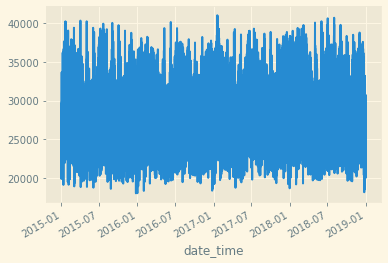

In [33]:
load.total_load_actual.plot()

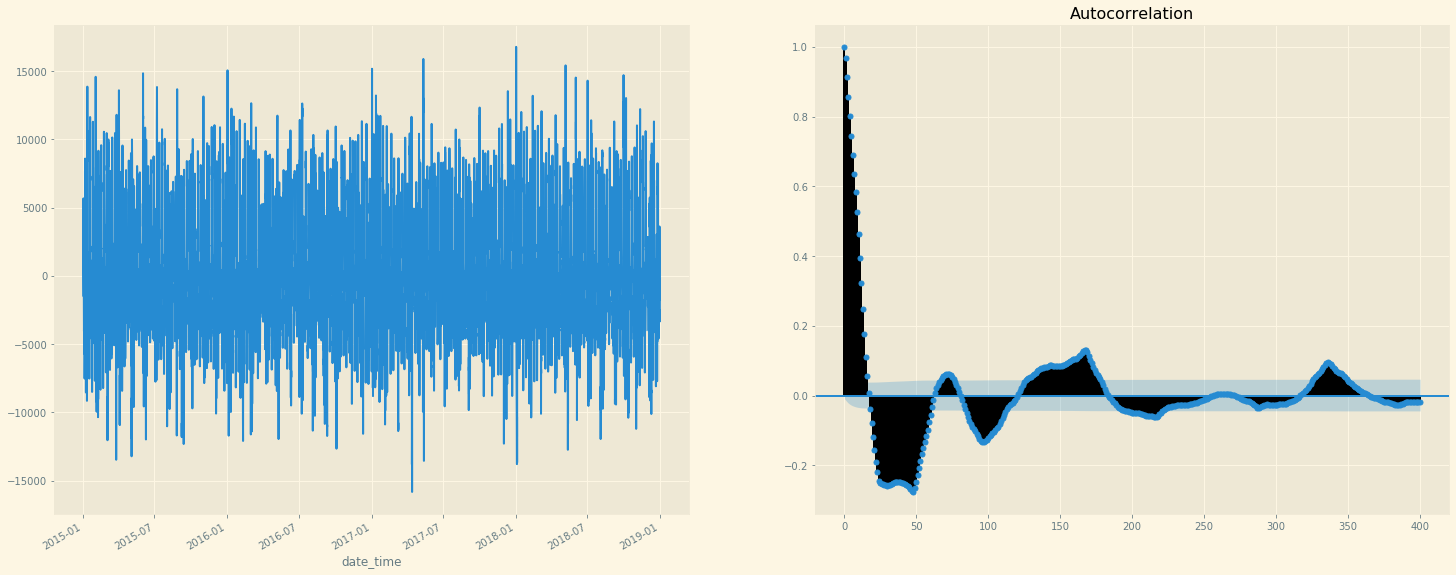

In [80]:
#Remove Seasonality
load['deseasoned_load_actual'] = load.total_load_actual.diff(24)

#Create plot
f, ax = plt.subplots(1,2, figsize = (25,10))

#Visualize deseasoned data
load['deseasoned_load_actual'].plot(ax = ax[0])

#Visualize acf of deseasoned_load_actual
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(load.deseasoned_load_actual[24:], lags = 400,  ax = ax[1])

### Test for stationarity

**Functions for tests**

In [49]:
#Import KPSS and ADF
from statsmodels.tsa.stattools import adfuller, kpss

#Function runs ADF and KPSS test on series, prints results
def ADF_KPSS_test(series, periods):
    """
    Series: Time series data you would like to test for stationrity
    Periods: Seasonal period
    """
    #Convert series to values and subset to remove NA values
    X = series.values[periods:]
    
    #Implement ADF and KPSS
    adf_results = adfuller(X)
    kpss_results = kpss(X)
    
    #Print results
    print('ADF Statistic: {}'.format(adf_results[0]))
    print('P-Value: {}'.format(adf_results[1]))
    for k,v in adf_results[4].items():
        print('Critical Values {} : {}'.format(k,round(v,4)))
    print('===============================================')
    print('KPSS Statistic: {}'.format(kpss_results[0]))
    print('P-Value: {}'.format(kpss_results[1]))
    for k,v in kpss_results[3].items():
        print('Critical Values {} : {}'.format(k,round(v,4)))
    
#Function calculates and prints mean and variance metrics of first and second half of time series
def mean_var_test(series, periods):
    """
    Series: Time series data you would like to test for stationrity
    Periods: Seasonal period
    """
    #Convert series to values and subset to remove NA values
    X = series.values[periods:]
    
    #Set split to be midpoint of time series
    split = round(len(X)/2)
    #Split time series
    X1,X2 = X[:split], X[split:]
    #calculate and print mean and var of 2 halves of time series 
    mean1, mean2 = np.mean(X1), np.mean(X2)
    var1, var2 = np.var(X1), np.var(X2)
    return print('Mean1: {}\nMean2: {}\nVar1: {}\nVar2: {}'.format(mean1, mean2, var1, var2))

**Test Load Data**

*Deseasoned temperature data*

In [50]:
#Test deseasoned_load_actual
ADF_KPSS_test(load.deseasoned_load_actual, 24)

ADF Statistic: -28.965850627136746
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0025532547435734606
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [51]:
#View metrics variance and mean stats
mean_var_test(load.deseasoned_load_actual,24)

Mean1: 3.1507420091324203
Mean2: -0.4103310502283105
Var1: 12347489.43201429
Var2: 12580203.649037104


*Deseasoned log-temperature data*

In [44]:
# #Test deseasoned temp
# ADF_KPSS_test(, 24)

ADF Statistic: -29.23372706340709
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.02509369617161985
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [45]:
# #View metrics variance and mean stats
# mean_var_test(,24)

Mean1: -2.539769744571666e-05
Mean2: 0.00013426765560083315
Var1: 0.01188505232730019
Var2: 0.014399375599010058


**Stationarize data - Price**

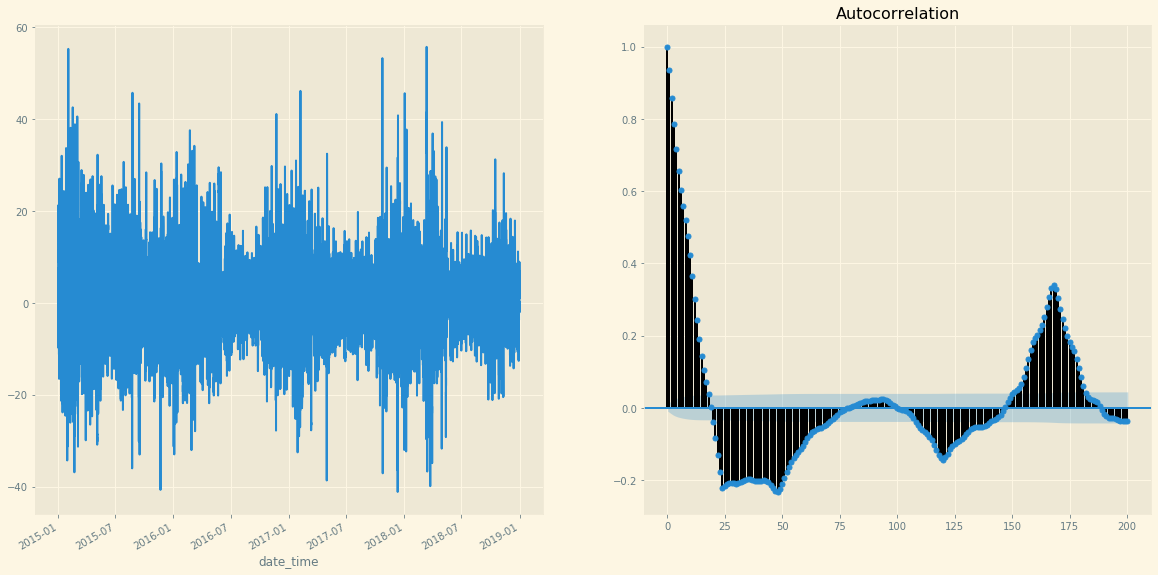

In [74]:
#Deseason price_actual
price['deseasoned_price_actual'] = price['price_actual'].diff(24)


#Visualize deseasoned_price_actual
#Set figure
f, ax = plt.subplots(1,2,figsize = (20,10))

#Plot data
price['deseasoned_price_actual'].plot(ax=ax[0])

acf_results = plot_acf(price['deseasoned_price_actual'][24:], lags = 200, ax=ax[1])

In [60]:
price.head()

,price_day_ahead,price_actual,deseasoned_price_actual
date_time,,,
2015-01-01 00:00:00,50.10,65.41,NaN
2015-01-01 01:00:00,48.10,64.92,NaN
2015-01-01 02:00:00,47.33,64.48,NaN
2015-01-01 03:00:00,42.27,59.32,NaN
2015-01-01 04:00:00,38.41,56.04,NaN


### Test for stationarity

**Test Price Data**

*Deseasoned temperature data*

In [75]:
#Test deseasoned_load_actual
ADF_KPSS_test(price.deseasoned_price_actual, 24)

ADF Statistic: -31.04360441864854
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.004084099051978492
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [76]:
#View metrics variance and mean stats
mean_var_test(price.deseasoned_price_actual,24)

Mean1: 0.006474885844748834
Mean2: 0.001981735159817328
Var1: 80.52726602105878
Var2: 57.64894505674402


*Deseasoned log-temperature data*

In [77]:
# #Test deseasoned temp
# ADF_KPSS_test(, 24)

In [78]:
# #View metrics variance and mean stats
# mean_var_test(,24)